In [1]:
%matplotlib notebook
import re
import matplotlib.pyplot as plt

In [2]:
HEAD_PATTERN = re.compile(r'initial state: ([#\.]+)')
RULE_PATTERN = re.compile(r'([#\.]+) => ([#\.])')

In [3]:
def get_state_and_rules(filepath):
    rules = {}
    with open(filepath) as file:
        for index, line in enumerate(file.readlines()):
            if index == 0:
                state = HEAD_PATTERN.findall(line)[0]
            # skip line 1, empty
            elif index > 1:
                matches = RULE_PATTERN.findall(line)[0]
                before, after = matches[0], matches[1]
                if before in rules:
                    raise ValueError('Rule already exists: {}->{}'.format(before, after))
                rules[before] = after
    return (state, rules)

In [4]:
def get_next_state(state, rules):
    next_state = []
    state = '.....{}.....'.format(state)
    for index, char in enumerate(state[2:-2]):
        curr_rule = ''.join([state[i] for i in range(index-2, index+3)])
        next_state.append(rules.get(curr_rule, '.'))
    next_state = ''.join(next_state)
    return next_state

In [5]:
def get_state_list(state, rules, total_generations):
    states = [(state, 0)]
    bias = 0
    curr_state = state
    for i in range(total_generations):
        curr_state = get_next_state(curr_state, rules)
        bias -= 5
        states.append((curr_state, bias))
    return states

In [6]:
def calculate_sum_of_plant_indexes(states, bias=0):
    sum = 0
    for index, char in enumerate(states):
        if char == '#':
            sum += index+bias
    return sum

In [7]:
def print_states(states):
    for index, state in enumerate(states):
        print('{:02d}: {}'.format(index, state))

In [8]:
#filepath = 'data/day12_mini.txt'
filepath = 'data/day12.txt'
state, rules = get_state_and_rules(filepath)
states = get_state_list(state, rules, 20)

In [9]:
plant_index_sum = calculate_sum_of_plant_indexes(*states[20])
print('Sum: {}'.format(plant_index_sum))

Sum: 2909


In [10]:
# calculate many states and graph it
def plot_plant_index_sum(state, rules, total_generations):
    states = get_state_list(state, rules, total_generations)
    sums = []
    for state, bias in states:
        sum = calculate_sum_of_plant_indexes(state, bias)
        sums.append(sum)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(list(range(0, total_generations+1)), sums)

<IPython.core.display.Javascript object>


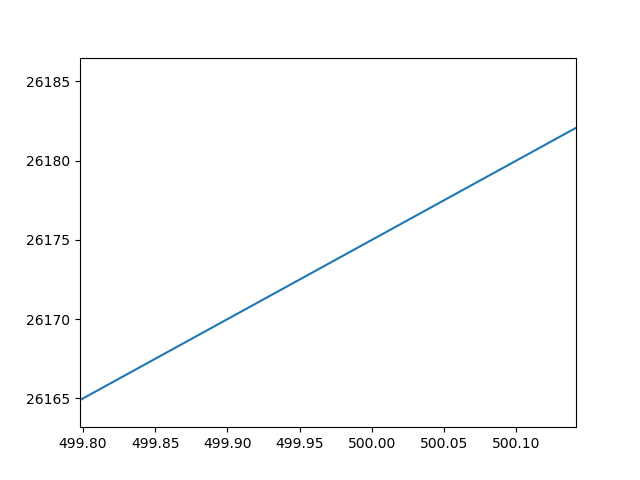

In [17]:
plot_plant_index_sum(state, rules, 1000)

In [12]:
def predict_plot_index_sum(state, rules, total_generations, stability_threshold=100):
    bias = 0
    curr_state = state
    prev_sum = 0
    delta = 0
    stability_count = 0
    for i in range(total_generations):
        curr_state = get_next_state(curr_state, rules)
        bias -= 5
        sum = calculate_sum_of_plant_indexes(curr_state, bias)
        new_delta = sum-prev_sum
        prev_sum = sum
        if new_delta == delta:
            stability_count += 1
        else:
            stability_count = 0
            delta = new_delta
        # if stability crosses a threshold
        if stability_count >= stability_threshold:
            # net_sum = curr_sum + delta*remain_generations
            predicted_sum = sum + delta*(total_generations-i-1)
            return predicted_sum
    return None

In [18]:
predicted_sum = predict_plot_index_sum(state, rules, 50000000000, 200)

In [19]:
print(predicted_sum)

2500000001175
